# K Means Clustering Projekt - Meine Lösung

Für dieses Projekt werden wir versuchen K Means Clustering zu verwenden, um Universitäten in den USA in zwei Gruppen zu unterteilen: Private und öffentliche.

*Ein wichtiger Hinweis gleich zu beginn: Für diese Universitäten wissen wir die tatsächliche Zuordnung und finden sie im Datensatz. Wir werden sie aber ignorieren da K Means Clustering ein Unsupervised Learning Algorithmus ist.*

Normalerweise verwendet man den K Means Clustering Algorithmus für Daten, deren Zugehörigkeit zu einem Cluster man nicht kennt. In diesem Fall verwenden wir die Zuteilung, um beurteilen zu können, wie gut der Algorithmus performt. Da das in echten Anwendungen nicht möglich ist sind Confusion Matrix und Classification Report am Ende des Projekts nur theoretische Auswertungen.

# Die Daten

Wir verwenden einen DataFrame mit 770 Beobachtungen und den folgenden 18 Variablen:

* Private: Dummy Varaible mit "Yes" für private und "No" für öffentliche Einrichtungen
* Apps: Anzahl an erhaltenen Bewerbungen
* Accept: Anzahl an angenommenen Bewerbungen
* Enroll: Anzahl neu eingeschriebener Studenten
* Top10perc: Prozent der neuen Studenten der Top 10% einer High School Klasse
* Top25perc: Prozent der neuen Studenten der Top 25% einer High School Klasse
* F.Undergrad: Anzahl an Vollzeitstudenten
* P.Undergrad: Anzahl an Teilzeitstudenten
* Outstate: Gebühr für Studentn, die aus einem anderen Staat kommen
* Room.Board: Kosten für Räume und Mitarbeiter
* Books: Geschätze Kosten für Bücher
* Personal: Geschätzte persönliche Ausgaben
* PhD: Prozent der Fakultäten mit Ph.D.'s
* Terminal: Prozent der Fakultäten mit Terminal Degree
* S.F.Ratio: Rate der Studenten pro Fakultät
* perc.alumni: Prozent der Alumni die spenden
* Expend: Verwaltungskosten pro Student
* Grad.Rate: Abschlussrate

## Libraries importieren

**Importiere die Libraries, die wir üblicherweise zur Datenanalyse verwenden.**

In [73]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 

## Die Daten

** Lies die CSV-Datei "College_Data" mit `read_csv` ein. Finde heraus, wie du die erste Spalte als Index definierst.**

In [74]:
data= pd.read_csv("College_Data",index_col=0)

In [75]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Checke den Head des DataFrames.**

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

**Checke die info() und describe() Methode der Daten.**

In [77]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


C:\Users\FTrst\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


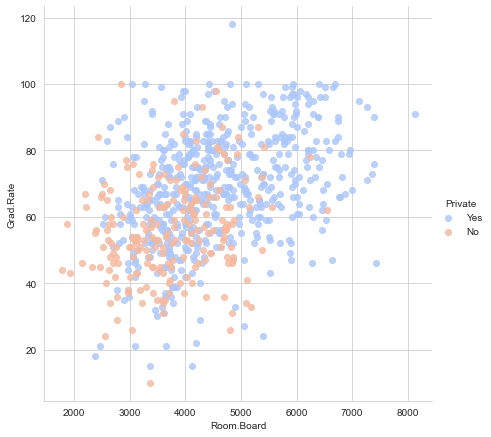

In [78]:
sns.set_style("whitegrid")
#sns.scatterplot("Room.Board", "Grad.Rate", hue="Private", data=data)
sns.lmplot(data=data, x="Room.Board", y="Grad.Rate",hue="Private", fit_reg=False,palette="coolwarm", size=6, aspect=1 )

## Explorative Datenanalyse

Zeit einige Visualisierungen zu erstellen!

**Erstelle ein Scatterplot von "Grad.Rate" vs. "Room.Board" in dem die Punkte nach der "Private" Spalte eingefärbt sind.**

C:\Users\FTrst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

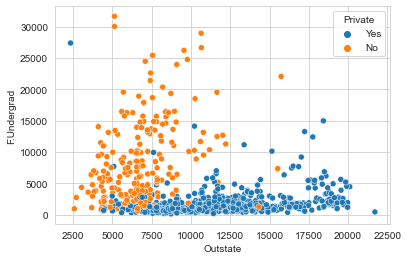

In [79]:
sns.scatterplot("Outstate","F.Undergrad", data= data , hue ="Private")

**Erstelle ein Scatterplot von "F.Undergrad" vs. "Outstate" in dem die Punkte nach der "Private" Spalte eingefärbt sind.**

<AxesSubplot:xlabel='Outstate', ylabel='Count'>

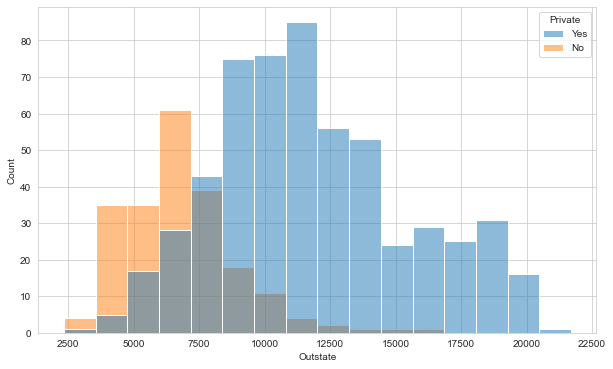

In [80]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x="Outstate", hue="Private")
#sns. facetGrid(...)

**Erstelle ein Histogramm zweier Betrachtungen in einem Diagramm. Es soll die "Out of State Tuition" (-> "Outstate" Spalte) gezeigt werden und die Histogramme nach "Private" geteilt werden.**

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

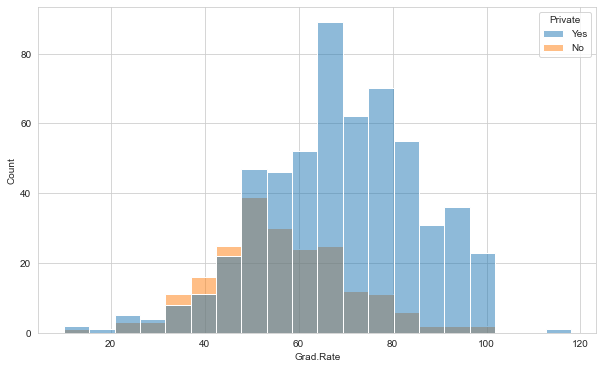

In [81]:

plt.figure(figsize=(10,6))
sns.histplot(data=data, x="Grad.Rate", hue= "Private")

**Erstelle ein gleiches Histogramm für "Grad.Rate".**

**Es sieht so aus als gäbe es eine Universität mit einer Abschlussrate von mehr als 100% (was natürlich unmöglich ist). Welche Universität ist das?**

In [82]:
data[data["Grad.Rate"]>100]



,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Setzte für diese Universität die Abschlussrate ("Grad.Rate") auf 100, damit es Sinn ergibt.**

*Hinweis: Dabei bekommst du wahrscheinlich eine Warnung (keinen Error). Überprüfe danach durch Visuaisierung oder DataFrame Operationen, ob es erfolgreich durchgeführt wurde.*

In [83]:
data["Grad.Rate"]["Cazenovia College"]=100

<ipython-input-83-ea6b3692fe96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Grad.Rate"]["Cazenovia College"]=100


In [84]:
data["Grad.Rate"]["Cazenovia College"]

100

C:\Users\FTrst\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


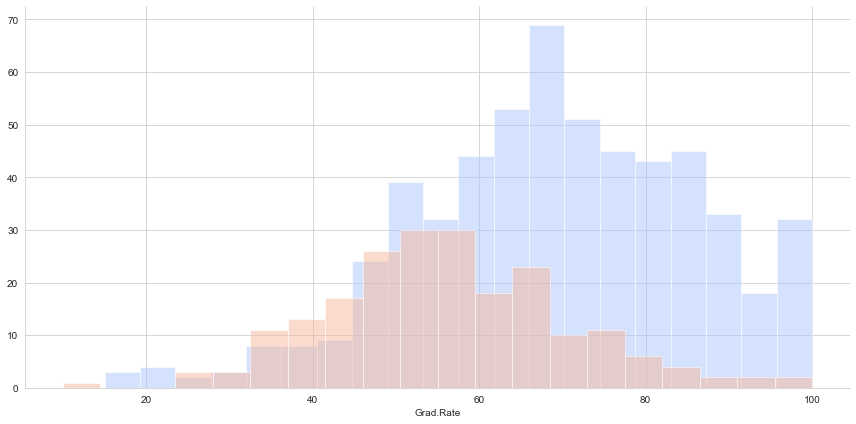

In [85]:
facet= sns.FacetGrid(data=data, hue="Private", palette="coolwarm", size=6, aspect=2)
facet = facet.map(plt.hist,"Grad.Rate", bins=20, alpha= 0.5)


# K Means Cluster erstellen

Jetzt ist es Zeit unsere Cluster zu erstellen!

**Importiere KMeans from SciKit Learn.**

In [86]:
from sklearn.cluster import KMeans

**Erstelle eine Instanz von einem K Means Modell mit 2 Clustern.**

In [87]:
cluster = KMeans(n_clusters=2)

In [88]:
data1 = data.drop(["Private"], axis=1)
#data.fit(data.drop("Private", axis=1))

In [89]:
data1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Fitte das Modell auf alle Daten (ohne die "Private" Spalte).**

In [90]:
cluster.fit(data1)

KMeans(n_clusters=2)

**Wie lauten die Cluster Zentrumsvektoren?**

In [91]:
cluster.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [92]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Auswertung

Es gibt nicht die eine perfekte Art, um dieses Clustering auszuwerten, wenn man keine Zuteilung vorliegen hat. Da dies nur eine Übung ist und wir die richtige Zuteilung kennen können wir unsere Cluster überprüfen.

**Erstelle eine neue Spalte namens "Cluster", welche ein 1 für private Universitäten und 0 für öffentliche beinhaltet.**

In [93]:
def converter(Cluster):
    if Cluster == "Yes":
        return 1
    else: 
        return 0

In [94]:
data["Cluster"]= data["Private"].apply(converter)
# data["Cluster"]= data["Private"].map("Yes":1, "No":0)                    methode ohne eigene funktion zu erstellen 
# data["Cluster"]= data["Private"].apply(lambda x: 1 if x=="Yes" else 0 )

In [95]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
print( confusion_matrix(data["Cluster"], cluster.labels_))

[[ 74 138]
 [ 34 531]]


**Erstelle eine Confusion Matrix und den Classification Report, um zu sehen wie gut unser K Means Clustering die Universitäten zugeordnet hat.**

In [98]:
print(classification_report(data["Cluster"],cluster.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

